In [38]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Regular expression to capture the data
pattern = re.compile(r"type\s*:\s*(\d+),\s*d\s*:\s*(\d+),\s*weight\s*=\s*([\d.]+),\s*result\s*=\s*(\d+)")

# Function to read a file and extract data using the regex
def extract_data_from_file(file_path):
    extracted_data = []
    
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                type_val = int(match.group(1))
                d_val = int(match.group(2))
                weight_val = float(match.group(3))
                result_val = int(match.group(4))
                
                extracted_data.append({
                    'type': type_val,
                    'd': d_val,
                    'weight': weight_val,
                    'result': result_val
                })
    
    return extracted_data

# Example usage
# Assuming the text file is named 'data.txt' and is in the current directory
# extracted_data = extract_data_from_file('data.txt')
# print(extracted_data)


In [12]:
raw_data = pd.DataFrame(extract_data_from_file('result_0902.txt'))
raw_data.head()

,type,d,weight,result
0,35,440,0.333333,18
1,35,420,0.333333,11
2,35,340,0.333333,17
3,35,360,0.333333,9
4,35,260,0.333333,15


In [19]:
data35 = raw_data[raw_data.type == 35]
data30 = raw_data[raw_data.type == 30]
data25 = raw_data[raw_data.type == 25]

In [29]:
data35_pivoted = pd.pivot(data = data35, index = 'd', columns='weight', values = 'result')
data30_pivoted = pd.pivot(data = data30, index = 'd', columns='weight', values = 'result')
data25_pivoted = pd.pivot(data = data25, index = 'd', columns='weight', values = 'result')

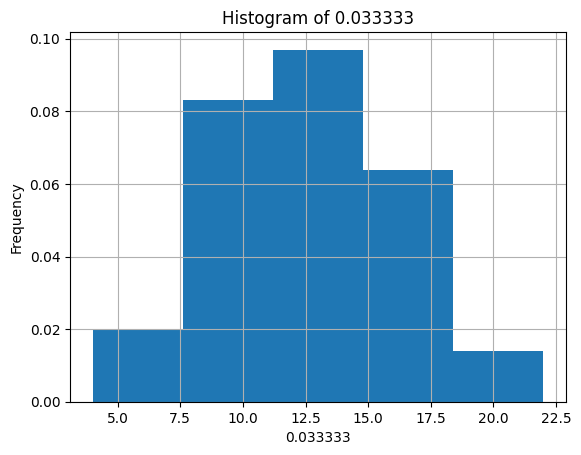

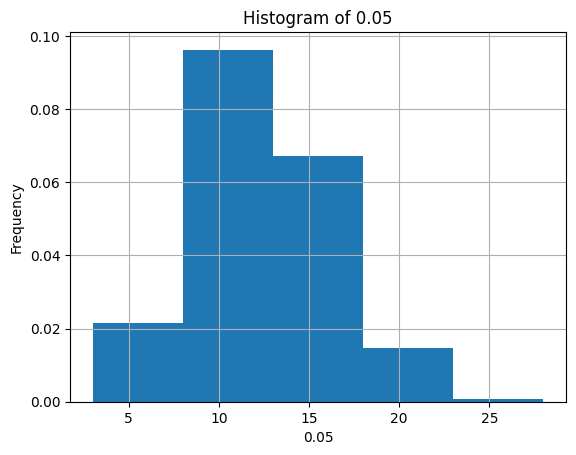

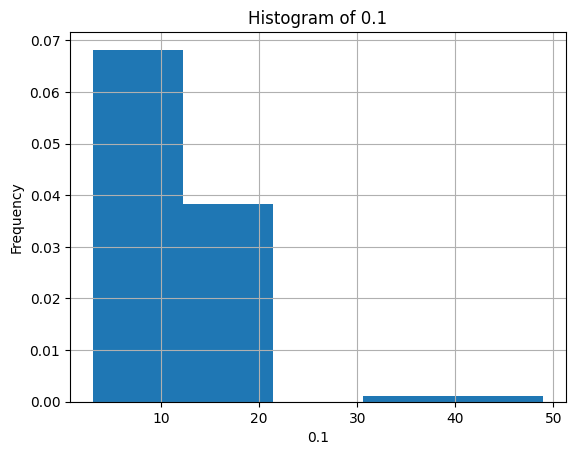

In [40]:
for column in data25_pivoted.columns:
    plt.figure()
    data25_pivoted[column].hist(bins=5, density = True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

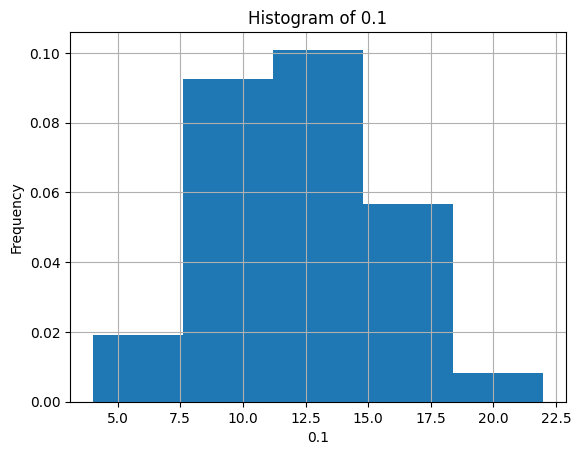

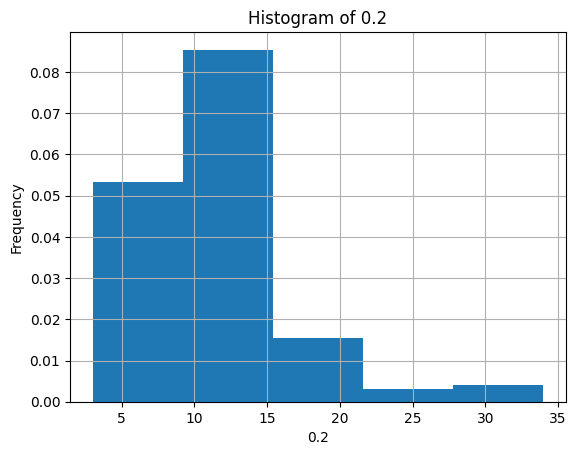

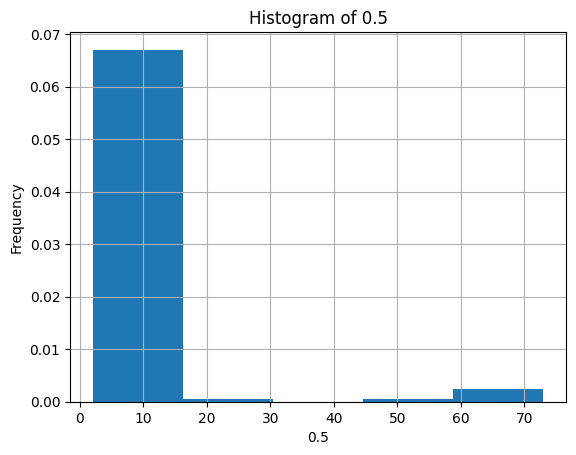

In [41]:
for column in data30_pivoted.columns:
    plt.figure()
    data30_pivoted[column].hist(bins=5, density = True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

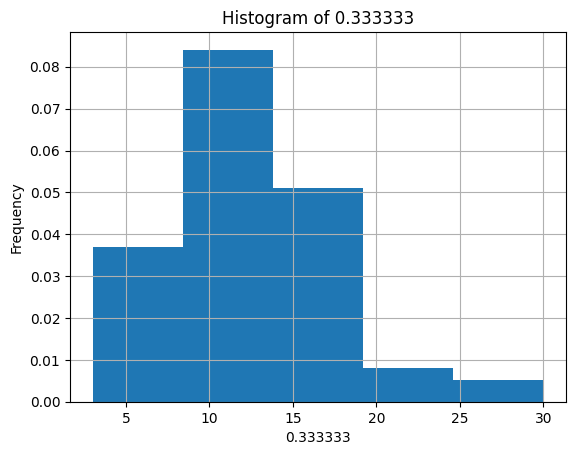

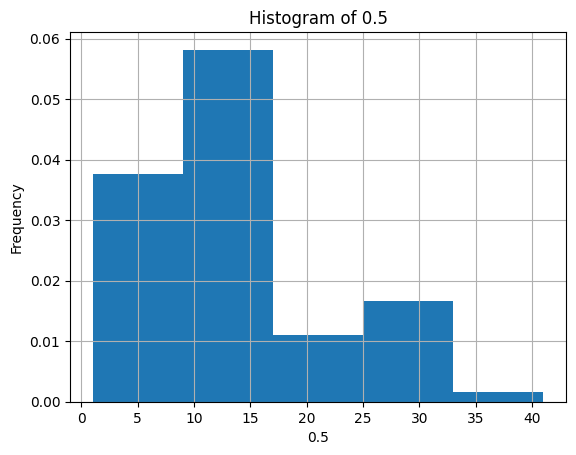

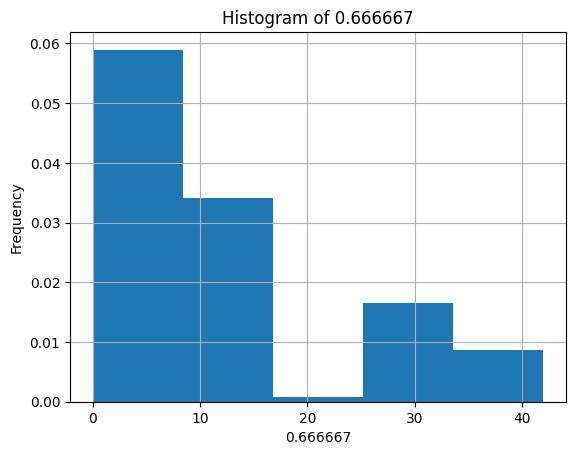

In [42]:
for column in data35_pivoted.columns:
    plt.figure()
    data35_pivoted[column].hist(bins=5, density = True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [44]:
print(data25_pivoted.mean())
print(data25_pivoted.var())
print(data30_pivoted.mean())
print(data30_pivoted.var())
print(data35_pivoted.mean())
print(data35_pivoted.var())


weight
0.033333    12.553459
0.050000    12.202532
0.100000    11.843137
dtype: float64
weight
0.033333    12.317322
0.050000    14.181073
0.100000    28.467117
dtype: float64
weight
0.1    12.156156
0.2    11.728972
0.5    10.670927
dtype: float64
weight
0.1     10.596024
0.2     24.016939
0.5    126.868928
dtype: float64
weight
0.333333    12.374233
0.500000    13.037975
0.666667    12.782178
dtype: float64
weight
0.333333     23.059519
0.500000     58.100141
0.666667    110.601403
dtype: float64
